# **외국인근로자 근로 및 복지 환경 거시적 분석**🧐

# **공통 라이브러리 및 모듈 불러오기**

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [3]:
#한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

# **Ⅰ 연도별 체류 외국인 현황**

**1) 데이터 전처리**

In [4]:
#csv 파일 불러오기
foreigner = pd.read_csv('연도별 외국인 체류 현황.csv', encoding='cp949')
foreigner.head()

,국적(지역)별(1),성별(1),2016,2016.1,2016.2,2016.3,2016.4,2016.5,2016.6,2016.7,...,2020.28,2020.29,2020.30,2020.31,2020.32,2020.33,2020.34,2020.35,2020.36,2020.37
0,국적(지역)별(1),성별(1),합계,외교(A-1),공무(A-2),사증면제(B-1),관광통과(B-2),일시취재(C-1),단기방문(C-3),단기취업(C-4),...,거주(F-2),동반(F-3),재외동포(F-4),영주(F-5),결혼이민(F-6),기타(G-1),관광취업(H-1),방문취업(H-2),관광상륙(T-1),기타(Others)
1,총계,계,2049441,2992,2230,112323,118566,27,190443,594,...,43666,20050,466682,160947,133987,33196,874,154537,257,90654
2,총계,남자,1117206,1597,1395,56041,55209,21,101814,443,...,19354,7457,228317,74714,26042,24813,196,93196,144,63242
3,총계,여자,932235,1395,835,56282,63357,6,88629,151,...,24312,12593,238365,86233,107945,8383,678,61341,113,27412
4,총계,제3의성,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [5]:
#각 연도별로 합계만 불러오기
data=foreigner.loc[1, ['2016','2017','2018','2019','2020']]
data

2016    2049441
2017    2180498
2018    2367607
2019    2524656
2020    2036075
Name: 1, dtype: object

In [6]:
#값을 실수형(floaat)으로 변환
data = data.astype('float') 
data

2016    2049441.0
2017    2180498.0
2018    2367607.0
2019    2524656.0
2020    2036075.0
Name: 1, dtype: float64

**2) 시각화_막대 그래프**

In [7]:
#그래프 크기 설정
plt.rcParams['figure.figsize'] = (8,6)

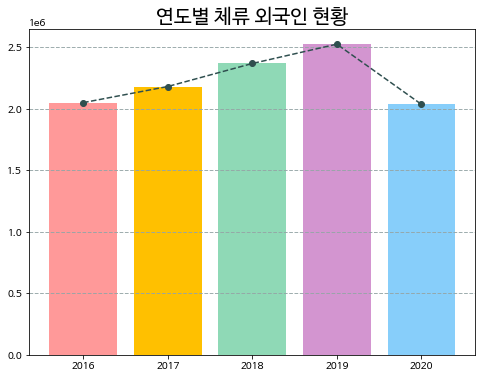

In [11]:
#x축 라벨 설정
x= ['2016','2017','2018','2019','2020']

#막대 그래프 설정
plt.title('연도별 체류 외국인 현황', fontsize = 20)
plt.bar(x, data, color = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', 'lightskyblue'])
#그리드 설정
plt.grid(color='#95a5a6ed', linestyle='--', linewidth=1, axis='y', alpha=0.9)
#꺾은선 그래프 설정
plt.plot(x, data, color='darkslategray', linestyle='--', marker='o')

plt.show()

# **Ⅱ 비자 유형에 따라 구분한 외국인 체류 요인**

In [12]:
#범례를 나타내기 위한 라이브러리
import matplotlib.patches as mpatches 
import matplotlib.lines as mlines 

**1) 데이터 전처리**

In [13]:
#csv 파일 불러오기
for_stay = pd.read_csv('법무부_외국인체류데이터_20191231.csv', encoding='cp949')
for_stay.head()

,대륙,국적,성별,D-1(문화예술),D-2(유학),D-3(기술연수),D-4(일반연수),D-5(취재),D-6(종교),D-7(주재),...,E-10(선원취업),F-1(방문동거),F-2(거주),F-3(동반),F-5(영주),F-6(결혼이민),G-1(기타),H-1(관광취업),H-2(방문취업),기타(other)
0,아시아주,한국계중국인,남성,1.0,465.0,80.0,130.0,1.0,1.0,12.0,...,1.0,9474.0,5207.0,18.0,47026.0,6693.0,162.0,NaN,117420.0,5.0
1,아시아주,한국계중국인,여성,1.0,682.0,59.0,112.0,NaN,NaN,1.0,...,NaN,10679.0,5729.0,35.0,41833.0,10683.0,70.0,NaN,75235.0,3.0
2,아시아주,중국,남성,10.0,22044.0,375.0,4651.0,10.0,11.0,246.0,...,2601.0,14275.0,6863.0,551.0,11234.0,4467.0,2779.0,NaN,16.0,272.0
3,아시아주,중국,여성,6.0,37619.0,253.0,5082.0,11.0,28.0,79.0,...,1.0,22374.0,10856.0,1163.0,22213.0,19586.0,1325.0,NaN,17.0,268.0
4,아시아주,베트남,남성,2.0,8120.0,81.0,20420.0,NaN,37.0,26.0,...,8030.0,13180.0,1187.0,474.0,372.0,2691.0,672.0,NaN,NaN,108.0


In [14]:
#NaN값 0으로 채우기
for_stay = for_stay.fillna(0)

#대륙, 국적, 성별 칼럼 제거
for_stay = for_stay.drop(['대륙', '국적', '성별'], axis=1)

#값을 정수형(int)으로 변환
for_stay = for_stay.astype(int)

#컬럼명 정제
for_stay.columns = ['문화예술','유학','기술연수','일반연수','취재', '종교', '주재', '기업투자', '무역경영',
              '구직', '교수', '회화강사', '연구', '기술지도', '전문직업', '예술흥행', '특정활동', 
              '비전문취업', '선원취업', '방문동거', '거주', '동반', '영주', '결혼이민', '기타_1', '관광취업', '방문취업', '기타_2']

#[기타_1]과 [기타_2]를 [기타]로 병합
for_stay['기타'] = for_stay['기타_1']+for_stay['기타_2']
for_stay = for_stay.drop(['기타_1', '기타_2'], axis=1)

for_stay.head()

,문화예술,유학,기술연수,일반연수,취재,종교,주재,기업투자,무역경영,구직,...,비전문취업,선원취업,방문동거,거주,동반,영주,결혼이민,관광취업,방문취업,기타
0,1,465,80,130,1,1,12,35,2,0,...,352,1,9474,5207,18,47026,6693,0,117420,167
1,1,682,59,112,0,0,1,19,2,0,...,257,0,10679,5729,35,41833,10683,0,75235,73
2,10,22044,375,4651,10,11,246,764,109,899,...,1989,2601,14275,6863,551,11234,4467,0,16,3051
3,6,37619,253,5082,11,28,79,221,33,1404,...,274,1,22374,10856,1163,22213,19586,0,17,1593
4,2,8120,81,20420,0,37,26,20,5,271,...,32979,8030,13180,1187,474,372,2691,0,0,780


In [15]:
#컬럼명 확인
for_stay.columns

Index(['문화예술', '유학', '기술연수', '일반연수', '취재', '종교', '주재', '기업투자', '무역경영', '구직',
       '교수', '회화강사', '연구', '기술지도', '전문직업', '예술흥행', '특정활동', '비전문취업', '선원취업',
       '방문동거', '거주', '동반', '영주', '결혼이민', '관광취업', '방문취업', '기타'],
      dtype='object')

In [16]:
#리스트에 컬럼 저장
columns = ['문화예술', '유학', '기술연수', '일반연수', '취재', '종교', '주재', '기업투자', '무역경영', '구직',
       '교수', '회화강사', '연구', '기술지도', '전문직업', '예술흥행', '특정활동', '비전문취업', '선원취업',
       '방문동거', '거주', '동반', '영주', '결혼이민', '관광취업', '방문취업', '기타']

#각 컬럼의 합계 도출
sum = for_stay[columns].sum()
sum

문화예술         59
유학       117415
기술연수       1280
일반연수      59526
취재           89
종교         1523
주재         1375
기업투자       5875
무역경영       2320
구직         5412
교수         2183
회화강사      13798
연구         3109
기술지도        219
전문직업        606
예술흥행       3231
특정활동      20997
비전문취업    270751
선원취업      17131
방문동거     120962
거주        43403
동반        22414
영주       153038
결혼이민     129200
관광취업       2948
방문취업     223513
기타        49430
dtype: int64

In [80]:
#새 데이터프레임 생성
for_stay_new = pd.DataFrame()

#컬럼명 지정, 값은 sum으로 지정
for_stay_new['응답수'] = sum

#인덱스를 '체류요인' 컬럼으로 변경
for_stay_new = for_stay_new.rename_axis('체류요인').reset_index()
for_stay_new.head(10)

,체류요인,응답수
0,문화예술,59
1,유학,117415
2,기술연수,1280
3,일반연수,59526
4,취재,89
5,종교,1523
6,주재,1375
7,기업투자,5875
8,무역경영,2320
9,구직,5412


In [81]:
#비자 유형별로 그룹화해 컬럼 생성
for_stay_new = for_stay_new.assign(비자유형 = ['취업불가비자']*9 + ['전문인력 취업비자']*8 + ['단순노무 취업비자']*2
                                   + ['취업불가비자'] + ['업무무관 취업가능비자'] + ['취업불가비자']
                                   + ['업무무관 취업가능비자']*2 + ['단순노무 취업비자']*3)

#'비자유형' 컬럼을 기준으로 오름차순 정렬
for_stay_new = for_stay_new.sort_values(by = ['비자유형'], ascending = [True])

for_stay_new

,체류요인,응답수,비자유형
26,기타,49430,단순노무 취업비자
24,관광취업,2948,단순노무 취업비자
18,선원취업,17131,단순노무 취업비자
17,비전문취업,270751,단순노무 취업비자
25,방문취업,223513,단순노무 취업비자
23,결혼이민,129200,업무무관 취업가능비자
22,영주,153038,업무무관 취업가능비자
20,거주,43403,업무무관 취업가능비자
16,특정활동,20997,전문인력 취업비자
15,예술흥행,3231,전문인력 취업비자


In [82]:
#비자 유형을 기준으로 그룹화, 데이터프레임으로 변환
for_stay_group = pd.DataFrame(for_stay_new.groupby('비자유형')['응답수'].sum()).sort_values(by = '응답수', ascending = False)

#인덱스를 컬럼으로 재배치
for_stay_group = for_stay_group.reset_index()

for_stay_group

,비자유형,응답수
0,단순노무 취업비자,563773
1,취업불가비자,332838
2,업무무관 취업가능비자,325641
3,전문인력 취업비자,49555


**2) 시각화_원그래프**

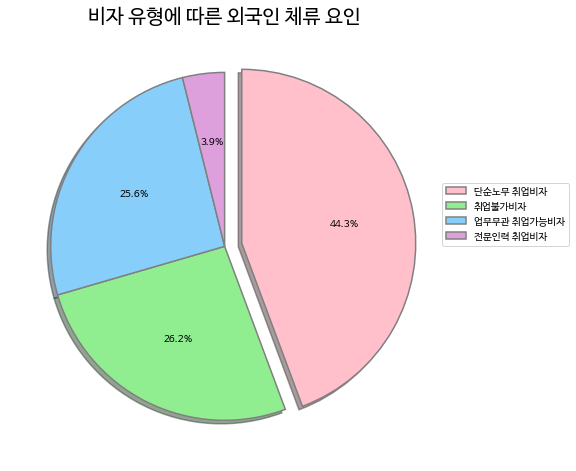

In [150]:
#그래프 크기 설정
plt.rcParams['figure.figsize'] = (10, 8)

#비자 유형이 '단순노무 취업비자'인 항목 강조
explode = (0.1,0,0,0)

#색상 지정
colors = ['pink', 'lightgreen', 'lightskyblue', 'plum']

#테두리 그리기
wg = {'edgecolor': 'grey', 'linewidth':1.5}

#원그래프 그리기
plt.title('비자 유형에 따른 외국인 체류 요인', fontsize = 20)
plt.pie(for_stay_group['응답수'], autopct = '%1.1f%%', colors = colors, 
        shadow = True, startangle=90, counterclock=False, explode = explode, wedgeprops = wg)

#범례 출력
plt.legend(for_stay_group['비자유형'], loc = (1, 0.5))

plt.show()

# **Ⅲ 외국인근로자 관련 키워드 분석**
# **1. 뉴스 기사 크롤링_워드클라우드**

**1) 라이브러리 설치 및 불러오기**

In [105]:
#sys 모듈 설치
import sys

In [106]:
#필요 라이브러리 설치
!pip install beautifulsoup4
!pip install urllib3
!pip install openpyxl

#urllib : 특정 url 주소에 접근할 때 사용할 라이브러리
#beautifulsoup : url에서 html 정보를 파이썬에서 이해할 수 있는 언어로 변환하는 (parsing,파싱) 라이브러리

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [107]:
#라이브러리 불러오기
from bs4 import BeautifulSoup
import requests
import openpyxl

**2) 크롤링을 위한 함수 생성**

In [108]:
# 페이지 url 형식에 맞게 바꾸어 주는 함수 만들기
 #입력된 수를 1, 11, 21, 31 ...만들어 주는 함수
def makePgNum(num):
    if num == 1:
        return num
    elif num == 0:
        return num+1
    else:
        return num+9*(num-1)

In [109]:
# 크롤링할 url 생성하는 함수 만들기(검색어, 크롤링 시작 페이지, 크롤링 종료 페이지)
def makeUrl(search,start_pg,end_pg):
    if start_pg == end_pg:
        start_page = makePgNum(start_pg)
        url = "https://search.naver.com/search.naver?where=news&sm=tab_pge&query=" + search + "&start=" + '&sort=0&photo=0&field=0&pd=5&ds=2021.05.26&de=2022.05.26&cluster_rank=16&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:1y,a:all' + "&start=" + str(start_page)
        print("생성url: ",url)
        return url
    else:
        urls= []
        for i in range(start_pg,end_pg+1):
            page = makePgNum(i)
            url = "https://search.naver.com/search.naver?where=news&sm=tab_pge&query=" + search + '&sort=0&photo=0&field=0&pd=5&ds=2021.05.26&de=2022.05.26&cluster_rank=16&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:1y,a:all' + "&start=" + str(page)
            urls.append(url)
        print("생성url: ",urls)
        return urls

In [110]:
# html에서 원하는 속성 추출하는 함수 만들기 (기사, 추출하려는 속성값)
def news_attrs_crawler(articles,attrs):
    attrs_content=[]
    for i in articles:
        attrs_content.append(i.attrs[attrs])
    return attrs_content

In [111]:
#뉴스기사 내용 크롤링하는 함수 만들기(각 뉴스의 url)
def news_contents_crawler(news_url):
    contents=[]
    for i in news_url:
        #각 기사 html get하기
        news = requests.get(i)
        news_html = BeautifulSoup(news.text,"html.parser")
            #기사 내용 가져오기 (p태그의 내용 모두 가져오기) 
        contents.append(news_html.find_all('p'))
    return contents

In [112]:
#html생성해서 기사크롤링하는 함수 만들기(제목,url): 3개의 값을 반환함(제목, 링크, 내용)
def articles_crawler(url):
    #html 불러오기
    original_html = requests.get(i)
    html = BeautifulSoup(original_html.text, "html.parser")
    # 검색결과
    articles = html.select("div.group_news > ul.list_news > li div.news_area > a")
    title = news_attrs_crawler(articles,'title')
    url = news_attrs_crawler(articles,'href')
    content = news_contents_crawler(url)
    return title, url, content #3개의 값을 반환

**3) 뉴스 기사 크롤링**

In [113]:
#검색어 입력
search = input("검색할 키워드를 입력해주세요:")

#검색 시작할 페이지 입력
page = int(input("\n크롤링할 시작 페이지를 입력해주세요. ex)1(숫자만입력):")) # ex)1 =1페이지,2=2페이지...
print("\n크롤링할 시작 페이지: ",page,"페이지")   
#검색 종료할 페이지 입력
page2 = int(input("\n크롤링할 종료 페이지를 입력해주세요. ex)1(숫자만입력):")) # ex)1 =1페이지,2=2페이지...
print("\n크롤링할 종료 페이지: ",page2,"페이지")   

# naver url 생성
url = makeUrl(search,page,page2)

#뉴스 크롤러 실행
news_titles = []
news_url =[]
news_contents =[]
for i in url:
    title, url,content = articles_crawler(url)
    news_titles.append(title)
    news_url.append(url)
    news_contents.append(content)

print("검색된 기사 갯수: 총 ",(page2+1-page)*10,'개')
print("\n[뉴스 제목]")
print(news_titles)
print("\n[뉴스 링크]")
print(news_url)
print("\n[뉴스 내용]")
print(news_contents)

검색할 키워드를 입력해주세요:외국인노동자

크롤링할 시작 페이지를 입력해주세요. ex)1(숫자만입력):1

크롤링할 시작 페이지:  1 페이지

크롤링할 종료 페이지를 입력해주세요. ex)1(숫자만입력):2

크롤링할 종료 페이지:  2 페이지
생성url:  ['https://search.naver.com/search.naver?where=news&sm=tab_pge&query=외국인노동자&sort=0&photo=0&field=0&pd=5&ds=2021.05.26&de=2022.05.26&cluster_rank=16&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:1y,a:all&start=1', 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=외국인노동자&sort=0&photo=0&field=0&pd=5&ds=2021.05.26&de=2022.05.26&cluster_rank=16&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:1y,a:all&start=11']
검색된 기사 갯수: 총  20 개

[뉴스 제목]
[['올해 외국인 계절노동자 1000명 경남 온다', '외국인 계절노동자 397명 창녕·거창 투입', '"외국인 노동자 없어서 공사 못해"… 전문건설업계, 정부에 \'고용제한 해제\' 건의', '[Why] 구글·아마존이 외국인 직원 자녀 ‘추방 금지’ 탄원서 제출한 이유', '"이주노동자 보호에 함께한 모든 이들과 함께받는 상"', "농가 일손 부족…외국인 노동자 배정받으려면 '숙소 필요'", '인도네시아 노동자들, 공동체 풋살대회로 타국생활 극복', '“체류자격 변경 외국인 건강보험 유지” 인권위 권고에 정부 불수용', '마산중부서·창원외국인노동자지원센터, 사회공헌활동', '[B tv 전주뉴스] 무주군

**4) 크롤링 결과를 데이터프레임 및 csv 파일로 저장**

In [114]:
#제목, 링크, 내용 1차원 리스트로 꺼내는 함수 생성
def makeList(newlist, content):
    for i in content:
        for j in i:
            newlist.append(j)
    return newlist
    
#제목, 링크, 내용 담을 리스트 생성
news_titles_1, news_url_1, news_contents_1 = [],[],[]

#1차원 리스트로 만들기(내용 제외)
makeList(news_titles_1,news_titles)
makeList(news_url_1,news_url)
makeList(news_contents_1,news_contents)


#데이터 프레임 만들기
news_df = pd.DataFrame({'title':news_titles_1,'link':news_url_1,'content':news_contents_1})
news_df

,title,link,content
0,올해 외국인 계절노동자 1000명 경남 온다,http://www.idomin.com/news/articleView.html?id...,"[[외국인 계절노동자 1000여 명이 올해 경남지역 농촌 일손을 돕는다.], [경남..."
1,외국인 계절노동자 397명 창녕·거창 투입,https://news.kbs.co.kr/news/view.do?ncd=548138...,"[[\n, [배수영 기자], \n, [sooyoung@kbs.co.kr], \n],..."
2,"""외국인 노동자 없어서 공사 못해""… 전문건설업계, 정부에 '고용제한 해제' 건의",http://moneys.mt.co.kr/news/mwView.php?no=2022...,[[안녕하세요. 머니S 재테크부 김노향 기자입니다. 투자와 기업에 관련한 많은 제보...
3,[Why] 구글·아마존이 외국인 직원 자녀 ‘추방 금지’ 탄원서 제출한 이유,https://biz.chosun.com/international/internati...,[]
4,"""이주노동자 보호에 함께한 모든 이들과 함께받는 상""",http://www.ibulgyo.com/news/articleView.html?i...,[[“개인으로 받은 상이라기보다 외국인 노동자들 인권 보호를 위해 저와 함께 동행해...
5,농가 일손 부족…외국인 노동자 배정받으려면 '숙소 필요',http://news.lghellovision.net/news/newsView.do...,[[\r\n\t\t\t\t\t\t\t<앵커> 6월은 모내기가 마무리되는 시기입니다....
6,"인도네시아 노동자들, 공동체 풋살대회로 타국생활 극복",http://www.breaknews.com/900245,"[[\n, [시작페이지로], l , [즐겨찾기], l , [RSS], l , ..."
7,“체류자격 변경 외국인 건강보험 유지” 인권위 권고에 정부 불수용,https://news.kmib.co.kr/article/view.asp?arcid...,"[[\n, a href=""list.asp?sid1=mis"">¹Ì¼Ç</a><span..."
8,"마산중부서·창원외국인노동자지원센터, 사회공헌활동",http://www.knnews.co.kr/news/articleView.php?i...,[[마산중부경찰서(서장 박도영)와 창원외국인노동자지원센터(센터장 정점자)는 지난 5...
9,"[B tv 전주뉴스] 무주군, 외국인 계절노동자에 무료 건강검진 지원",http://ch1.skbroadband.com/content/view?parent...,"[[\n, [\r\n 무주군 보건의료원이 외국인 계절근로자를 대..."


**5) 데이터 전처리**

In [115]:
#csv 파일로 저장
news_df.to_csv('뉴스크롤링.csv', encoding = 'utf8')

In [116]:
#csv 파일 불러오기
example = pd.read_csv('NaverNews.csv')
example

,Unnamed: 0,title,link,content
0,0,[휴대폰 든 상자만 훔친 택배사 외국인일용직 2명 '덜미'],https://n.news.naver.com/mnews/article/003/001...,[\n\n\n\n\n[순천=뉴시스] 전남 순천경찰서. (사진=순천경찰서 제공·뉴시스...
1,1,"[방역지침 완화에 경북 시·군, 외국인 계절근로자 앞다퉈 도입]",https://n.news.naver.com/mnews/article/001/001...,[\n작년보다 2배 증가 1천614명 배정…포항·영덕 등 농·어가에 배치\n\n\n...
2,2,[“개시장 단골은 70대 노인과 외국인 노동자뿐... 이젠 접어야죠”],https://n.news.naver.com/mnews/article/023/000...,"[\n[아무튼, 주말] 이재명이 해결했다는 ‘숙제’성남 모란 개시장 가보니\t\t\..."
3,3,[부산 도금 공장에서 불…외국인 노동자 6명 대피],https://n.news.naver.com/mnews/article/056/001...,[\n\n\n\n\n오늘(20일) 새벽 1시 10분쯤 부산 사하구의 한 도금 공장 ...
4,4,[아파트 공사현장서 30대 노동자 사망… 광주 중대재해 처벌 1호 되나],https://n.news.naver.com/mnews/article/079/000...,[\n신축 아파트 공사현장서 펌프카 기둥 추락 인부 덮쳐중국 국적 노동자 1명 사망...
...,...,...,...,...
305,305,[[6·1 지방선거 후보 정책팸플릿] 철원군수],https://n.news.naver.com/mnews/article/654/000...,[\n고속도로 철원연장 한목소리…지역소멸 해법은 시각차민간 장례시설 외 대부분 전원...
306,306,[충북 음성서 고기 가공업체 외국인 노동자 등 66명 무더기 확진],https://n.news.naver.com/mnews/article/028/000...,[\n충북 14일 105명 확진 역대 하루 최다…위·중증 병상 2개 남아\n\n\n...
307,307,[“외국인노동자 코로나 검사 의무는 차별”…지자체 행정명령 철회],https://n.news.naver.com/mnews/article/081/000...,[\n\n\n\n\n서울 양천구의 한 공사현장에 설치된 ‘찾아가는 선별진료소’에서 ...
308,308,[“외국인노동자 코로나 검사 의무는 차별”…지자체 행정명령 철회],https://n.news.naver.com/mnews/article/081/000...,[\n\n\n\n\n서울 양천구의 한 공사현장에 설치된 ‘찾아가는 선별진료소’에서 ...


In [117]:
#컬럼명 변경
data = example[['title', 'content']]
data

,title,content
0,[휴대폰 든 상자만 훔친 택배사 외국인일용직 2명 '덜미'],[\n\n\n\n\n[순천=뉴시스] 전남 순천경찰서. (사진=순천경찰서 제공·뉴시스...
1,"[방역지침 완화에 경북 시·군, 외국인 계절근로자 앞다퉈 도입]",[\n작년보다 2배 증가 1천614명 배정…포항·영덕 등 농·어가에 배치\n\n\n...
2,[“개시장 단골은 70대 노인과 외국인 노동자뿐... 이젠 접어야죠”],"[\n[아무튼, 주말] 이재명이 해결했다는 ‘숙제’성남 모란 개시장 가보니\t\t\..."
3,[부산 도금 공장에서 불…외국인 노동자 6명 대피],[\n\n\n\n\n오늘(20일) 새벽 1시 10분쯤 부산 사하구의 한 도금 공장 ...
4,[아파트 공사현장서 30대 노동자 사망… 광주 중대재해 처벌 1호 되나],[\n신축 아파트 공사현장서 펌프카 기둥 추락 인부 덮쳐중국 국적 노동자 1명 사망...
...,...,...
305,[[6·1 지방선거 후보 정책팸플릿] 철원군수],[\n고속도로 철원연장 한목소리…지역소멸 해법은 시각차민간 장례시설 외 대부분 전원...
306,[충북 음성서 고기 가공업체 외국인 노동자 등 66명 무더기 확진],[\n충북 14일 105명 확진 역대 하루 최다…위·중증 병상 2개 남아\n\n\n...
307,[“외국인노동자 코로나 검사 의무는 차별”…지자체 행정명령 철회],[\n\n\n\n\n서울 양천구의 한 공사현장에 설치된 ‘찾아가는 선별진료소’에서 ...
308,[“외국인노동자 코로나 검사 의무는 차별”…지자체 행정명령 철회],[\n\n\n\n\n서울 양천구의 한 공사현장에 설치된 ‘찾아가는 선별진료소’에서 ...


In [118]:
#예시 파일을 txt 파일로 정리
data.to_csv('NaverNews_data.txt')

**6) 시각화_워드클라우드**

In [119]:
!pip install konlpy
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.4 MB/s 
     |████████████████████████████████| 453 kB 43.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [122]:
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Okt
from PIL import Image

In [123]:
with open('NaverNews_data.txt', 'r', encoding='utf-8') as f:
    text = f.read()

#명사만 추출
okt = Okt()
nouns = okt.nouns(text)

#단어의 길이가 1개인 것은 제외
words = [n for n in nouns if len(n) > 1]

#위에서 얻은 words를 처리해 단어별 빈도수 형태의 딕셔너리 데이터 도출
c = Counter(words)
c

Counter({'휴대폰': 4,
         '상자': 7,
         '택배': 16,
         '외국인': 1753,
         '일용직': 11,
         '덜미': 3,
         '순천': 12,
         '뉴시스': 46,
         '전남': 34,
         '경찰서': 36,
         '사진': 108,
         '제공': 138,
         '재판매': 28,
         '금지': 62,
         '류형': 1,
         '기자': 183,
         '회사': 63,
         '고가': 1,
         '휴대전화': 39,
         '노동자': 1547,
         '하차': 7,
         '작업': 148,
         '상습': 2,
         '혐의': 62,
         '절도': 3,
         '우즈베키스탄': 13,
         '국적': 83,
         '조사': 171,
         '중이': 37,
         '지난': 187,
         '차례': 18,
         '상당': 6,
         '경찰': 132,
         '결과': 59,
         '고용': 338,
         '위해': 228,
         '밀봉': 2,
         '야산': 2,
         '신고': 72,
         '토대': 10,
         '수사': 14,
         '집하장': 1,
         '분석': 61,
         '조끼': 2,
         '바지': 2,
         '발견': 22,
         '주거지': 1,
         '정도': 78,
         '회수': 1,
         '외국': 49,
         '판매': 20,
         '보고': 38,


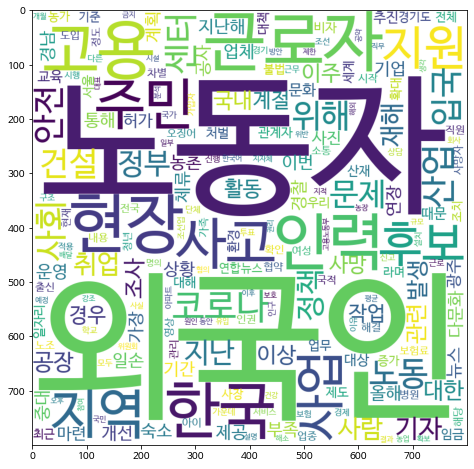

In [124]:
#한글로 워드클라우드 시각화
wc = WordCloud(font_path='NanumBarunGothic', background_color='white', width=400, height=400, scale=2.0, max_font_size=250)
cloud = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(cloud)

In [125]:
#파일로 저장
wc.to_file('워드클라우드_사각형.png')

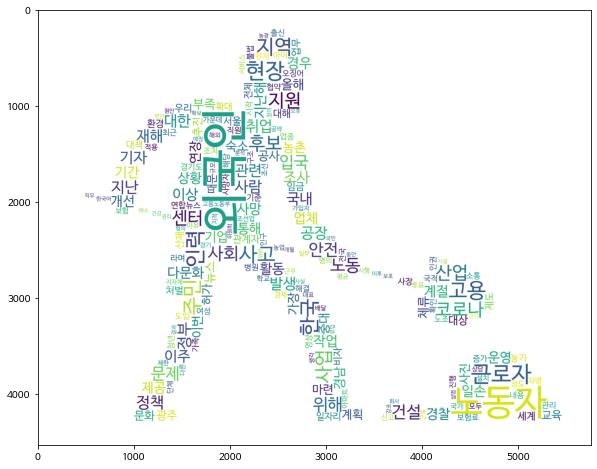

In [126]:
#사진 모양대로 워드클라우드 만들기
img = Image.open('worker.png')
img_array = np.array(img)

wc = WordCloud(font_path='NanumBarunGothic', background_color='white', width=400, height=400, scale=2.0, max_font_size=250, mask=img_array)
gen = wc.generate_from_frequencies(c)

plt.figure()
plt.imshow(gen)

In [127]:
#파일로 저장
wc.to_file('워드클라우드_일하는사람.png')

# **2. 뉴스 기사 크롤링_gephi**

(은재가 일요일에 사진 보내주면 첨부할 예정!)

# **3. 국가별 외국인근로자가 자주 사용하는 단어**

**1) 우즈베키스탄**

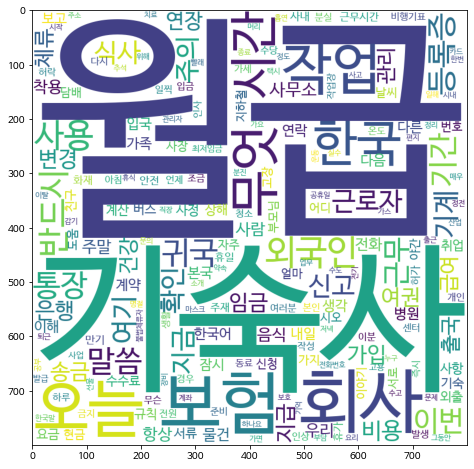

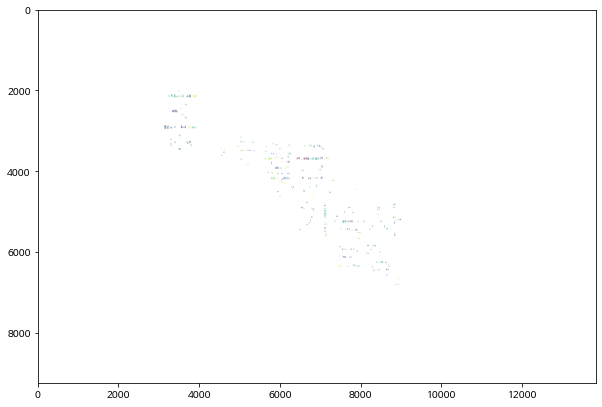

In [149]:
#우즈베키스탄 파일 불러오기
UZB = pd.read_csv('한국산업인력공단_외국인근로자가 자주 쓰는 외국어(우즈베키스탄).csv', encoding='cp949')
UZB

#한국어 문장만 추출
UZB_korean = UZB['한국어_문장']
UZB_korean

#txt파일로 저장
UZB_korean.to_csv('UZB_korean.txt')

#우즈베키스탄_단어추출
with open('UZB_korean.txt', 'r', encoding='utf-8') as f:
    text_UZB = f.read()

okt = Okt()
nouns = okt.nouns(text_UZB) # 명사만 추출

words_UZB = [n for n in nouns if len(n) > 1]

c_UZB = Counter(words_UZB) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함
c_UZB.pop('당신') #의미 없는 단어 삭제


#한글로 워드클라우드 시각화
wc = WordCloud(font_path='NanumBarunGothic', background_color='white', width=400, height=400, scale=2.0, max_font_size=250)
cloud_UZB = wc.generate_from_frequencies(c_UZB)

plt.figure()
plt.imshow(cloud_UZB)

#파일로 저장하기
wc.to_file('우즈베키스탄_워드클라우드.png')

#사진 모양대로 워드클라우드 만들기
img = Image.open('우즈베키스탄_지도.png')
img_array = np.array(img)

wc = WordCloud(font_path='NanumBarunGothic', background_color='white', width=400, height=400, scale=2.0, max_font_size=250, mask=img_array)
gen = wc.generate_from_frequencies(c_UZB)

plt.figure()
plt.imshow(gen)

#파일로 저장하기
wc.to_file('우즈베키스탄_워드클라우드_국가모양.png')

**2) 인도네시아**

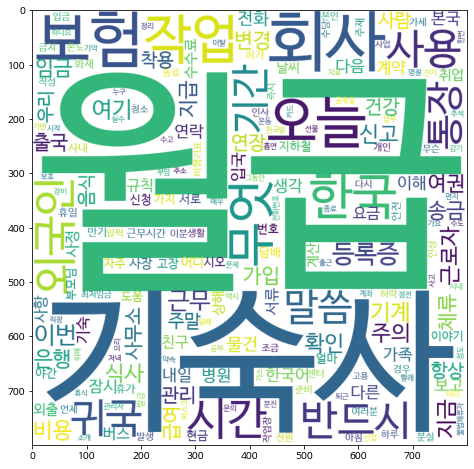

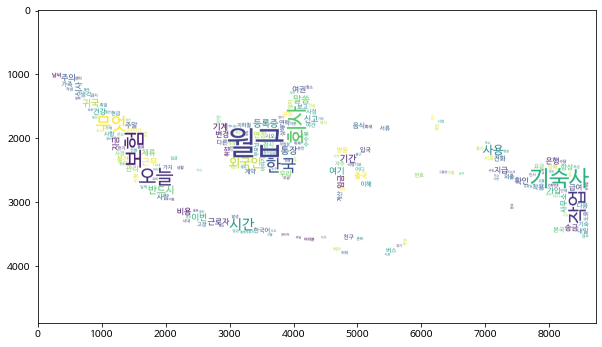

In [133]:
#인도네시아 파일 불러오기
INA = pd.read_csv('한국산업인력공단_외국인근로자가 자주 쓰는 외국어(인도네시아).csv', encoding='cp949')
INA

#한국어 문장만 추출
INA_korean = INA['한국어_문장']
INA_korean

#txt파일로 저장
INA_korean.to_csv('INA_korean.txt')

#우즈베키스탄_단어 추출
with open('INA_korean.txt', 'r', encoding='utf-8') as f:
    text_INA = f.read()

#명사만 추출
okt = Okt()
nouns = okt.nouns(text_INA)
#단어의 길이가 1개인 것은 제외
words_INA = [n for n in nouns if len(n) > 1]

#위에서 얻은 words를 처리해 단어별 빈도수 형태의 딕셔너리 데이터 도출
c_INA = Counter(words_INA)
#의미 없는 단어 삭제
c_INA.pop('당신')

#한글로 워드클라우드 시각화
wc = WordCloud(font_path='NanumBarunGothic', background_color='white', width=400, height=400, scale=2.0, max_font_size=250)
cloud_INA = wc.generate_from_frequencies(c_INA)

plt.figure()
plt.imshow(cloud_INA)

#워드클라우드를 파일로 저장
wc.to_file('인도네시아_워드클라우드.png')

#국가 형태대로 워드클라우드 구현
img = Image.open('인도네시아_지도.png')
img_array = np.array(img)

wc = WordCloud(font_path='NanumBarunGothic', background_color='white', width=400, height=400, scale=2.0, max_font_size=250, mask=img_array)
gen = wc.generate_from_frequencies(c_INA)

plt.figure()
plt.imshow(gen)

#파일로 저장
wc.to_file('인도네시아_워드클라우드_국가모양.png')

 **3) 중국**

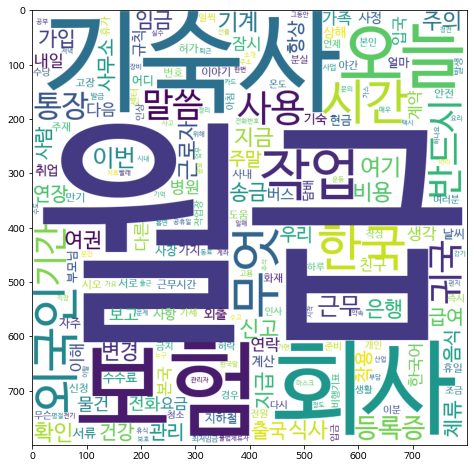

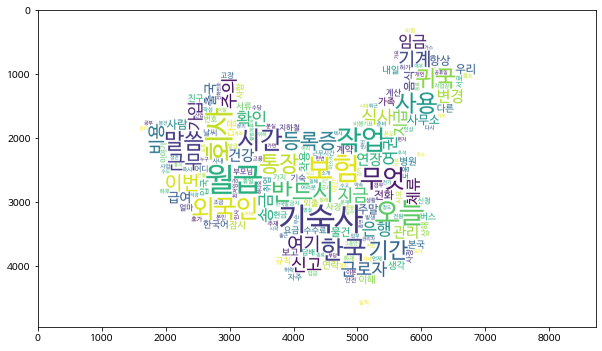

In [136]:
#중국 파일 불러오기
CHN = pd.read_csv('한국산업인력공단_외국인근로자가 자주 쓰는 외국어(중국).csv', encoding='cp949')
CHN

#한국어 문장만 추출
CHN_korean = CHN['한국어']
CHN_korean

#txt파일로 저장
CHN_korean.to_csv('CHN_korean.txt')

#우즈베키스탄_단어 추출
with open('CHN_korean.txt', 'r', encoding='utf-8') as f:
    text_CHN = f.read()

#명사만 추출
okt = Okt()
nouns = okt.nouns(text_CHN)
#단어의 길이가 1개인 것은 제외
words = [n for n in nouns if len(n) > 1]

#위에서 얻은 words를 처리해 단어별 빈도수 형태의 딕셔너리 데이터 도출
c_CHN = Counter(words)
#의미 없는 단어 삭제
c_CHN.pop('당신')

#한글로 워드클라우드 시각화
wc = WordCloud(font_path='NanumBarunGothic', background_color='white', width=400, height=400, scale=2.0, max_font_size=250)
cloud_CHN = wc.generate_from_frequencies(c_CHN)

plt.figure()
plt.imshow(cloud_CHN)

#워드클라우드를 파일로 저장
wc.to_file('중국_워드클라우드.png')

#국가 형태대로 워드클라우드 구현
img = Image.open('중국_지도.png')
img_array = np.array(img)

wc = WordCloud(font_path='NanumBarunGothic', background_color='white', width=400, height=400, scale=2.0, max_font_size=250, mask=img_array)
gen = wc.generate_from_frequencies(c_CHN)

plt.figure()
plt.imshow(gen)

#파일로 저장
wc.to_file('중국_워드클라우드_국가모양.png')

**4) 키르기스스탄**

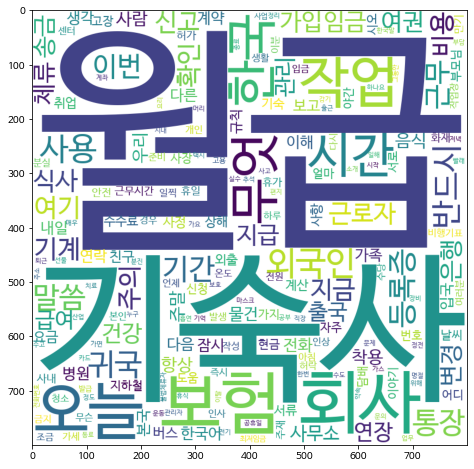

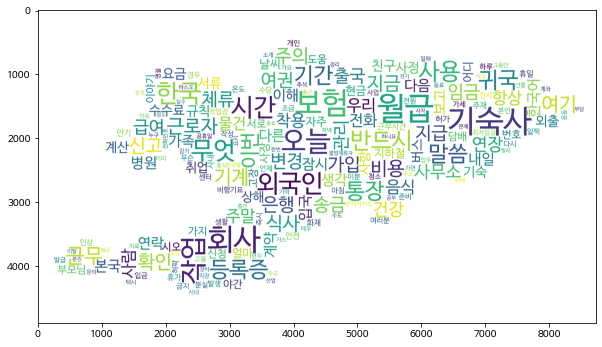

In [140]:
#키르기스스탄 파일 불러오기
KGZ = pd.read_csv('한국산업인력공단_외국인근로자가 자주 쓰는 외국어(키르기스스탄).csv', encoding='cp949')
KGZ

#한국어 문장만 추출
KGZ_korean = KGZ['한국어']
KGZ_korean

#txt파일로 저장
KGZ_korean.to_csv('KGZ_korean.txt')

#우즈베키스탄_단어 추출
with open('KGZ_korean.txt', 'r', encoding='utf-8') as f:
    text_KGZ = f.read()

#명사만 추출
okt = Okt()
nouns = okt.nouns(text_KGZ)
#단어의 길이가 1개인 것은 제외
words = [n for n in nouns if len(n) > 1]

#위에서 얻은 words를 처리해 단어별 빈도수 형태의 딕셔너리 데이터 도출
c_KGZ = Counter(words)
#의미 없는 단어 삭제
c_KGZ.pop('당신')


#한글로 워드클라우드 시각화
wc = WordCloud(font_path='NanumBarunGothic', background_color='white', width=400, height=400, scale=2.0, max_font_size=250)
cloud_KGZ = wc.generate_from_frequencies(c_KGZ)

plt.figure()
plt.imshow(cloud_KGZ)

#워드클라우드를 파일로 저장
wc.to_file('키르기스스탄_워드클라우드.png')

#국가 형태대로 워드클라우드 구현
img = Image.open('키르기스스탄_지도.png')
img_array = np.array(img)

wc = WordCloud(font_path='NanumBarunGothic', background_color='white', width=400, height=400, scale=2.0, max_font_size=250, mask=img_array)
gen = wc.generate_from_frequencies(c_KGZ)

plt.figure()
plt.imshow(gen)

#파일로 저장
wc.to_file('키르기스스탄_워드클라우드_국가모양.png')

**5) 필리핀**

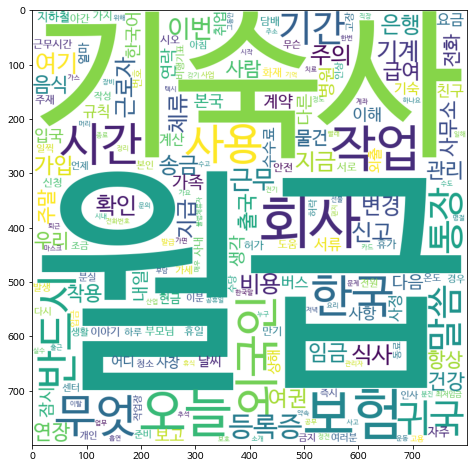

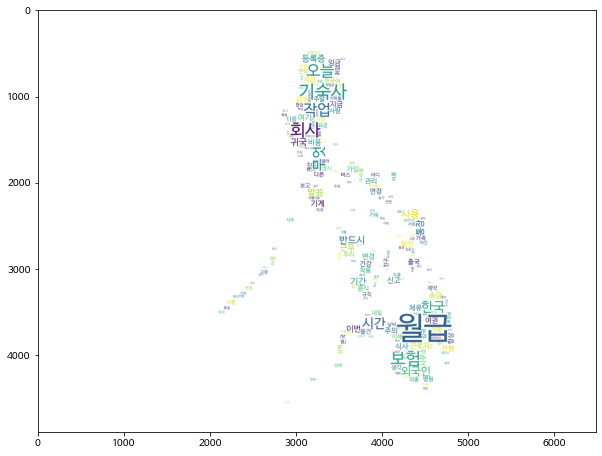

In [142]:
#필리핀 파일 불러오기
PHI = pd.read_csv('한국산업인력공단_외국인근로자가 자주 쓰는 외국어(필리핀).csv', encoding='cp949')
PHI

#한국어 문장만 추출
PHI_korean = PHI['한국어 문장']
PHI_korean

#txt파일로 저장
PHI_korean.to_csv('PHI_korean.txt')

#우즈베키스탄_단어 추출
with open('PHI_korean.txt', 'r', encoding='utf-8') as f:
    text_PHI = f.read()

#명사만 추출
okt = Okt()
nouns = okt.nouns(text_PHI)
#단어의 길이가 1개인 것은 제외
words = [n for n in nouns if len(n) > 1]

#위에서 얻은 words를 처리해 단어별 빈도수 형태의 딕셔너리 데이터 도출
c_PHI = Counter(words)
#의미 없는 단어 삭제
c_PHI.pop('당신') 

#한글로 워드클라우드 시각화
wc = WordCloud(font_path='NanumBarunGothic', background_color='white', width=400, height=400, scale=2.0, max_font_size=250)
cloud_PHI = wc.generate_from_frequencies(c_PHI)

plt.figure()
plt.imshow(cloud_PHI)

#워드클라우드를 파일로 저장
wc.to_file('필리핀_워드클라우드.png')

#국가 형태대로 워드클라우드 구현
img = Image.open('필리핀_지도.png')
img_array = np.array(img)

wc = WordCloud(font_path='NanumBarunGothic', background_color='white', width=400, height=400, scale=2.0, max_font_size=250, mask=img_array)
gen = wc.generate_from_frequencies(c_PHI)

plt.figure()
plt.imshow(gen)

#파일로 저장
wc.to_file('필리핀_워드클라우드_국가모양.png')

# **Ⅳ 외국인근로자 근로 환경 분석**
# **1. 근로 유형별 임금 수준**

# **2. 산재 발생 시 비용 부담 주체**

# **Ⅴ 외국인근로자 복지 현황 분석**
# **1. 외국인근로자 복지 연구 동향**

**1) 논문 크롤링**

In [155]:
import requests as req
from bs4 import BeautifulSoup as bs

#RISS에서 크롤링하고자 하는 검색어 입력 -> URL
page = int(input("페이지 수 : "))
search = input("검색어 : ")

url = "https://www.riss.kr/search/Search.do?isDetailSearch=N&searchGubun=true&viewYn=OP&query={}&queryText=&iStartCount={}&iGroupView=5&icate=all&colName=re_a_kor&exQuery=&exQueryText=&order=%2FDESC&onHanja=false&strSort=RANK&pageScale=10&orderBy=&fsearchMethod=search&isFDetailSearch=N&sflag=1&searchQuery={}&fsearchSort=&fsearchOrder=&limiterList=&limiterListText=&facetList=&facetListText=&fsearchDB=&resultKeyword={}&pageNumber=1&p_year1=&p_year2=&dorg_storage=&mat_type=&mat_subtype=&fulltext_kind=&t_gubun=&learning_type=&language_code=&ccl_code=&language=&inside_outside=&fric_yn=&image_yn=&regnm=&gubun=&kdc=&ttsUseYn="

페이지 수 : 10
검색어 : 외국인 노동자 복지


In [156]:
#새로운 데이터프레임 생성
df_info = pd.DataFrame(columns = ['저자', '국문 제목', '수록지', '국문 요약', '링크'])

authors = []
k_titles = []
books = []
abstracts = []

links = []

headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36'}

for i in range(page) :
    page_num = i * 10
    # print(page_num)
    
    res = req.get(url.format(search, page_num, search, search), headers = headers)
    html = bs(res.text, 'html.parser')
    items = html.findAll('div', {'class' : 'cont'})

    
    for item in items :
        # print(item)
        r_items = item.findAll('p', {'class' : 'title'})
        
        try : 
            abstract = item.find("p", {'class' : 'preAbstract'}).text.strip()
            abstracts.append(abstract)
        except Exception as ex :
            abstracts.append("")
        # print(abstract)
        # print("************")
    
        for detail in r_items :
            links.append(detail.find("a")["href"])
            k_titles.append(detail.find("a").text)
        
            
    for item in items :
        r_items = item.findAll('p', {'class' : 'etc'})
        for detail in r_items :
            authors.append(item.find("span", {'class' : 'writer'}).text)
            books.append(item.find("span", {'class' : 'assigned'}).text)
          
len(links), len(authors), len(k_titles), len(books), len(abstracts)

df_info['저자'] = authors
df_info['국문 제목'] = k_titles
df_info['수록지'] = books
df_info['국문 요약'] = abstracts
df_info['링크'] = links

df_info.to_csv('논문크롤링.txt')

**2) 시각화_워드클라우드**

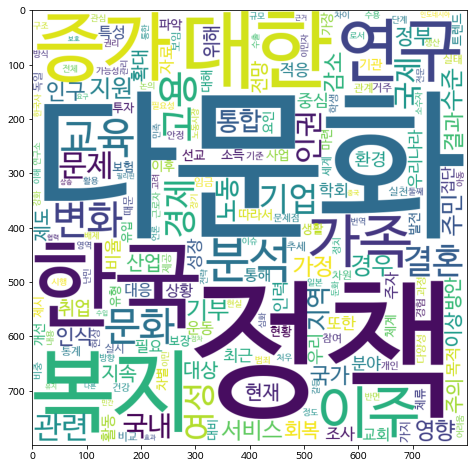

In [157]:
with open('논문크롤링.txt', 'r', encoding='utf-8') as f:
    text = f.read()

#명사만 추출
okt = Okt()
nouns = okt.nouns(text)
#단어의 길이가 1개인 것은 제외
words = [n for n in nouns if len(n) > 1]

#위에서 얻은 words를 처리해 단어별 빈도수 형태의 딕셔너리 데이터 도출
c = Counter(words)

#불필요한 단어 제거 
c.pop('외국인')
c.pop('노동자')
c.pop('사회')

#한글로 워드클라우드 시각화
wc = WordCloud(font_path='NanumBarunGothic', background_color='white', width=400, height=400, scale=2.0, max_font_size=250)
cloud = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(cloud)

# **2. 외국인근로자 지원센터 분포**

In [158]:
import seaborn as sns
import folium

!pip install googlemaps 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**1) 데이터 전처리**

In [163]:
#원본 csv 파일 불러오기
foreign_faccent = pd.read_csv('원래외노지원센터.csv')
foreign_faccent.head()

,순번,유형,기관명,소재지,연락처
0,1,거점센터,(사)지구촌사랑나눔,서울 구로구,02-6900-8000
1,2,거점센터,신한대학교 산학협력단,경기 의정부시,031-838-9111
2,3,거점센터,인제대학교,경남 김해시,055-338-2727
3,4,거점센터,사회복지법인 통도사자비원,경남 창원시,055-253-5270
4,5,거점센터,인천경총 및 한국노총 공동수급체,인천 남동구,032-431-4545


In [165]:
#위치 정보를 추가한 csv 파일 불러오기
foreign_faccent = pd.read_csv('외노지원센터.csv')
foreign_faccent.head()

,순번,유형,기관명,소재지,연락처,lat,lng
0,1,거점센터,(사)지구촌사랑나눔,서울 구로구,02-6900-8000,37.478752,126.896011
1,2,거점센터,신한대학교 산학협력단,경기 의정부시,031-838-9111,37.709416,127.043019
2,3,거점센터,인제대학교,경남 김해시,055-338-2727,35.248638,128.902946
3,4,거점센터,사회복지법인 통도사자비원,경남 창원시,055-253-5270,35.196265,128.566822
4,5,거점센터,인천경총 및 한국노총 공동수급체,인천 남동구,032-431-4545,37.454099,126.697833


In [166]:
#필요한 컬럼만 슬라이싱
slicing = foreign_faccent[['순번','lat','lng']]
slicing.head()

,순번,lat,lng
0,1,37.478752,126.896011
1,2,37.709416,127.043019
2,3,35.248638,128.902946
3,4,35.196265,128.566822
4,5,37.454099,126.697833


**2) 시각화_구글맵**

In [167]:
from folium import Marker

#센터 바꾸기
center = [37.541, 126.986]
m = folium.Map(location=center, zoom_start=6)

for i in slicing.index:

    folium.Marker(
        location = slicing.loc[i, ['lat', 'lng']],
        icon = folium.Icon(color='blue', icon='star') #Icon Marker 지정
    ).add_to(m)

for i in slicing.index:
    folium.Circle(
        location = slicing.loc[i, ['lat', 'lng']],
        tooltip = slicing.loc[i, '순번'],
        radius = 200,
        
    ).add_to(m)
m